# South Korea GDP Graphing

## Usual Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data

And I'm only taking the necessary columns

In [2]:
df = pd.read_csv("skgdp.csv")

df.tail(9)

,Year,GDP
54,2014,1484.32
55,2015,1465.77
56,2016,1500.11
57,2017,1627.89
58,2018,1724.85
59,2019,1651.42
60,2020,1637.90
61,2021,1798.53
62,2022,1675.31


### Plotting the Data

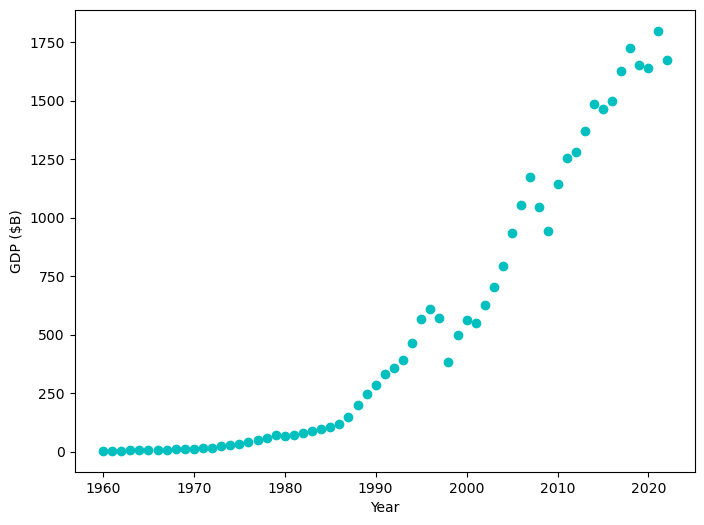

In [3]:
plt.figure(figsize=(8,6))
x_data, y_data = (df["Year"].values, df["GDP"].values)

plt.plot(x_data, y_data, 'co')
plt.ylabel('GDP ($B)')
plt.xlabel('Year')
plt.show()

### Making a Sigmoid func

-> Because the graph resembles a sigmoidal graph

In [4]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

### Normalizing our data to make it more computer-friendly

In [5]:
normalized_x_data = x_data / max(x_data)
normalized_y_data = y_data / max(y_data)

# for later use, functions to redo it
def un_normalize_x(x):
    return x * max(x_data)
def un_normalize_y(y):
    return y * max(y_data)

### An Optimized Sigmoid!

In [6]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, normalized_x_data, normalized_y_data)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 272.634139, beta_2 = 0.991338


### Plotting the optimal sigmoid for comparison

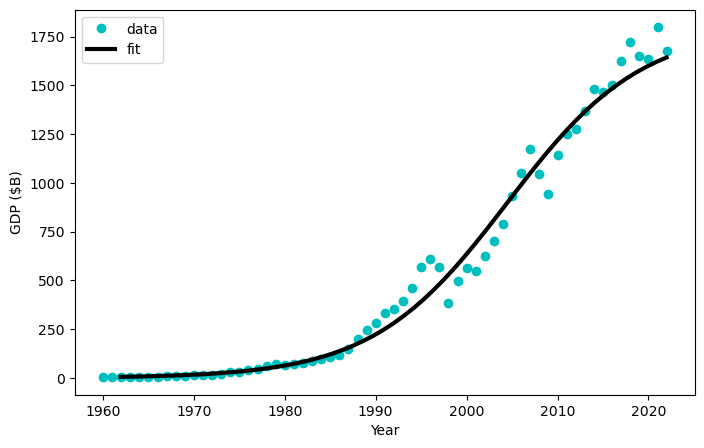

In [7]:
x = np.linspace(1960, 2020, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)


plt.plot(un_normalize_x(normalized_x_data), un_normalize_y(normalized_y_data), 'co', label='data')
plt.plot(un_normalize_x(x),un_normalize_y(y), linewidth=3.0, label='fit', color='black')
plt.legend(loc='best')
plt.ylabel('GDP ($B)')
plt.xlabel('Year')
plt.show()